<a href="https://colab.research.google.com/github/akshara-akkaladevi/SRISHTI_ML_Lab/blob/main/SRISHTI'23_Tutorial_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SRISHTI'23 - Tutorial 06**
# Linear Classifiers and Perceptron Algorithm
### Lab Coordinator: Shantanu Agrawal

In this lab, we will be studying the use of linear classifiers, followed by using perceptron learning algorithm.

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

Let's make a toy dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [3 4 1]
 [1 2 1]
 [0 1 1]
 [3 4 1]
 [1 3 1]
 [3 4 1]
 [2 1 1]
 [1 3 1]
 [3 3 1]
 [3 5 1]]


In [ ]:
# We have w or coefficients vector as
w = np.asarray([6,3,-12])

In [ ]:
# Now let's do the linear classification
# we do it by checking the value of G(X)

def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

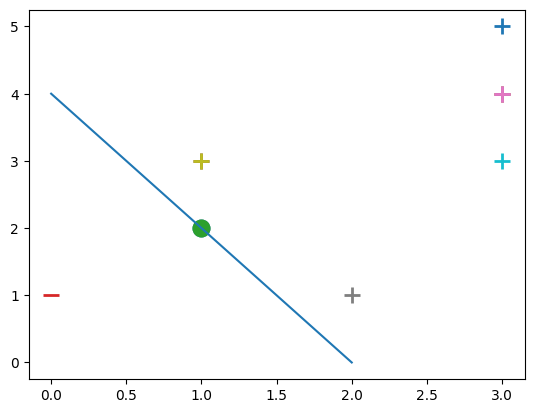

In [ ]:
# Lets first plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

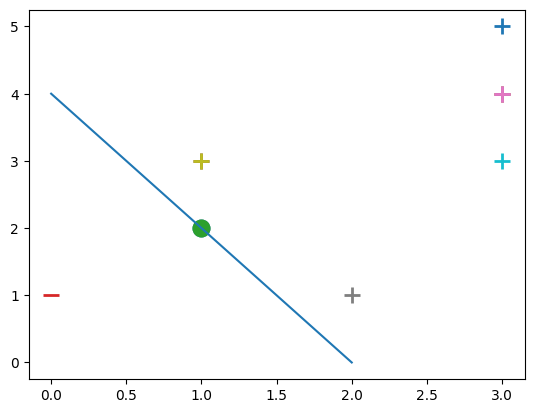

In [ ]:
# Now let's check what happens if we do it vector from

# First plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

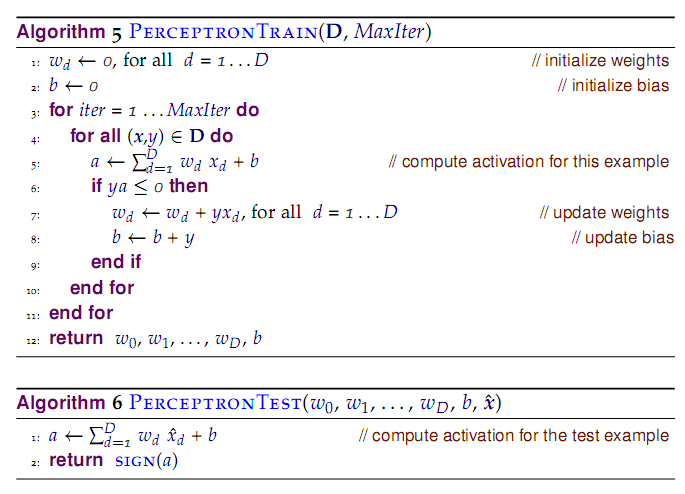

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [ ]:
# Creating the labeled dataset for the example simulation of above shown algorithm
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = np.array([-1, -1, 1, 1, 1])


In [ ]:
def perceptron_algo(X, Y):
    # random line is being called to start the algorithm
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [13]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

Next, we will see the the training error at each epoch.

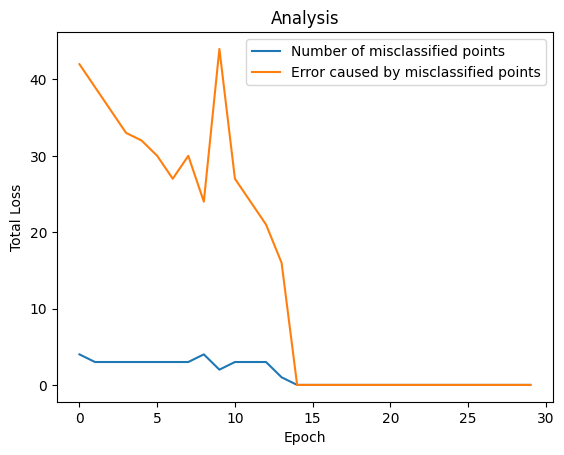

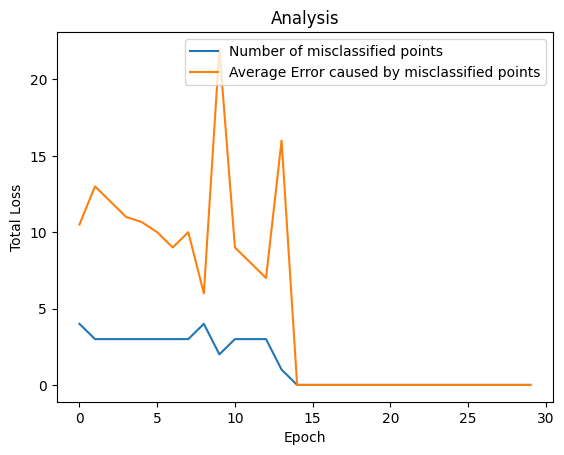

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

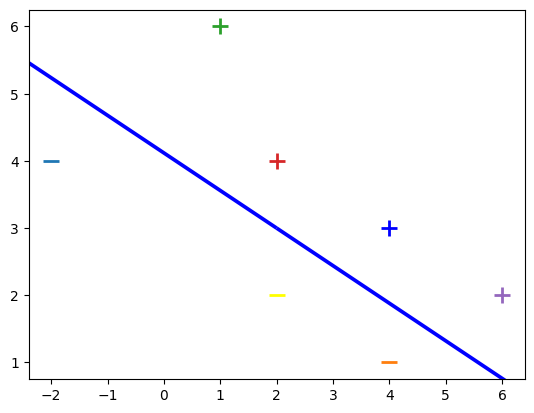

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   In our case eta or the learning rate is equal to 1. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3.   Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?
    - [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10). Try to get the gist of the blog, would be more clearer in the later part of the course.
5.   Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
    - [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182).
6.   Perceptron algorithm trains the model in the manner such that it **just** answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.
    - [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f). Try to read more such Medim or TowardsDataScience articles for understanding more about Machine Learning.
7.   Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.

#Question 1


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

banknote_data = pd.read_csv('/content/data_banknote_authentication_dataset.csv', header=None)

X = banknote_data.iloc[:, :-1].values
y = banknote_data.iloc[:, -1].values

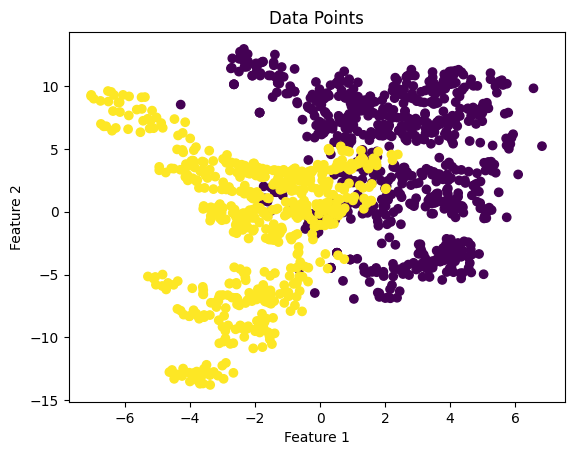

In [123]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.show()

In [124]:
banknote_data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:

sc = StandardScaler()
 
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [127]:

pca = PCA(n_components = 3)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [128]:
print(x_train)

[[-2.2542816   2.5496585   1.10833558]
 [-0.90053277 -1.03441708 -0.26385615]
 [ 2.82020813  1.69307601  0.601513  ]
 ...
 [-0.90375601  3.0292323  -0.95611308]
 [ 0.11038124  0.92835307 -1.05638756]
 [ 2.85038282  1.03002293  0.36278114]]


In [129]:
def perceptron_algorithm(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    
    return w

In [130]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

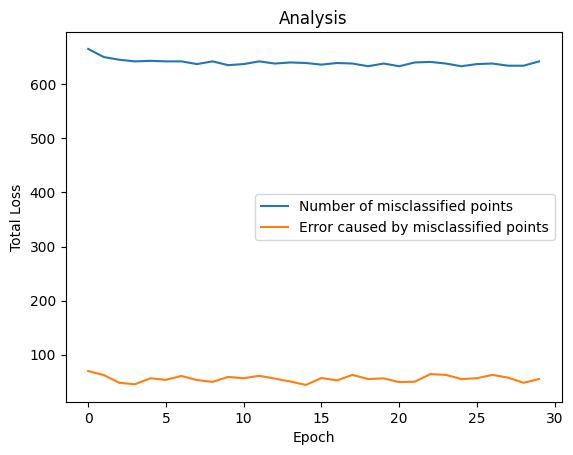

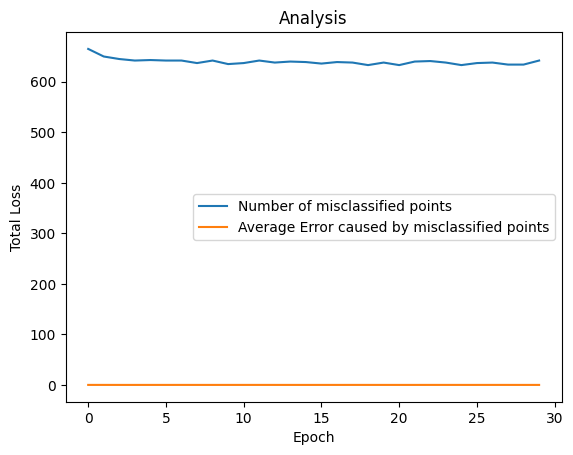

In [103]:
w = perceptron_algo_plot(x_train, y_train)

In [131]:
def predictions(w, test):
    if test.shape[1] != w.shape[0]:
        return None

    labels = np.where(test @ w < 0, 0, np.where(test @ w > 0, 1, None))
    return labels

In [132]:
y_pred=predictions(w,x_test)

In [133]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[116  32]
 [  9 118]]


#Question 2



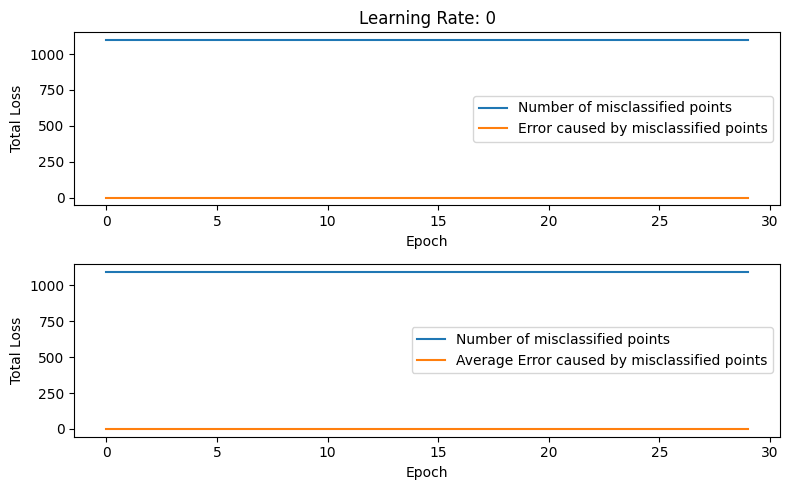

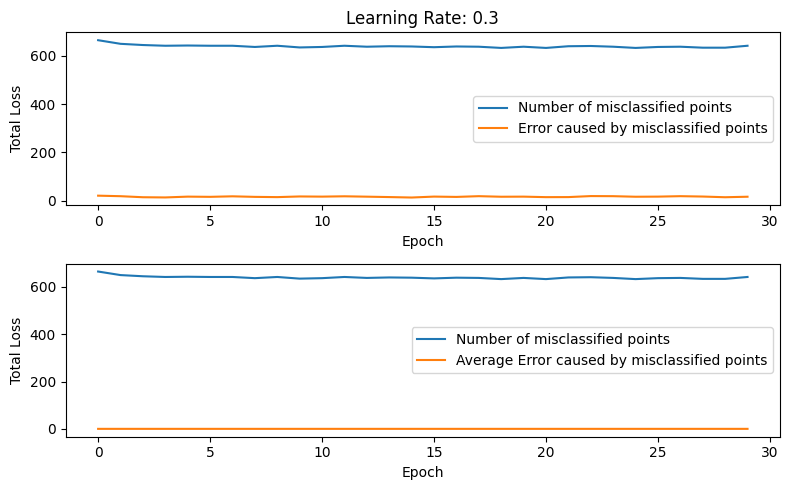

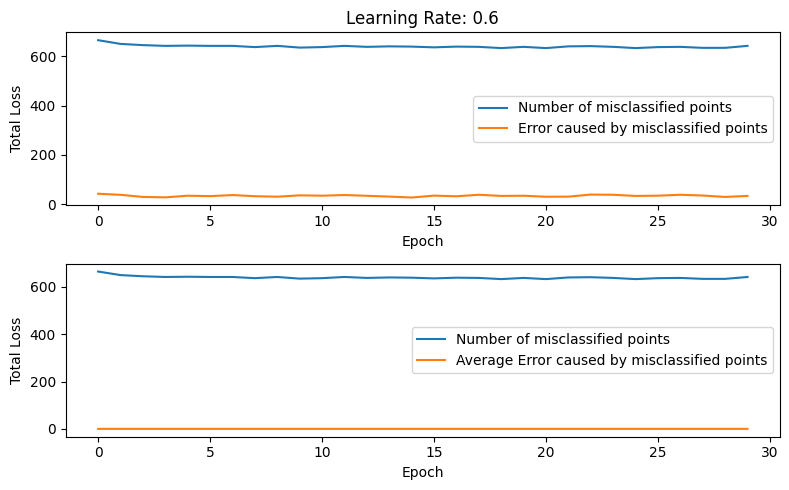

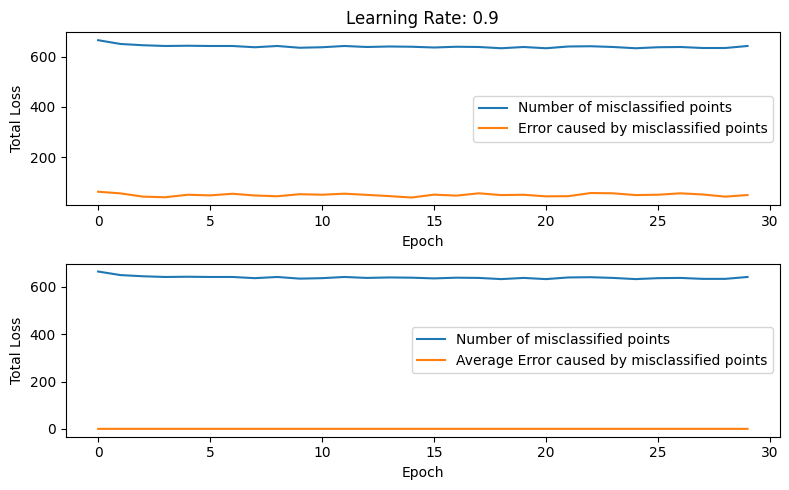

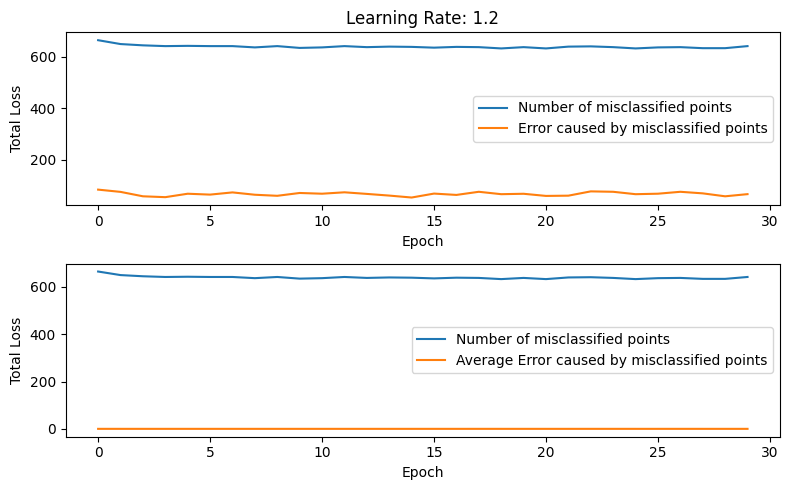

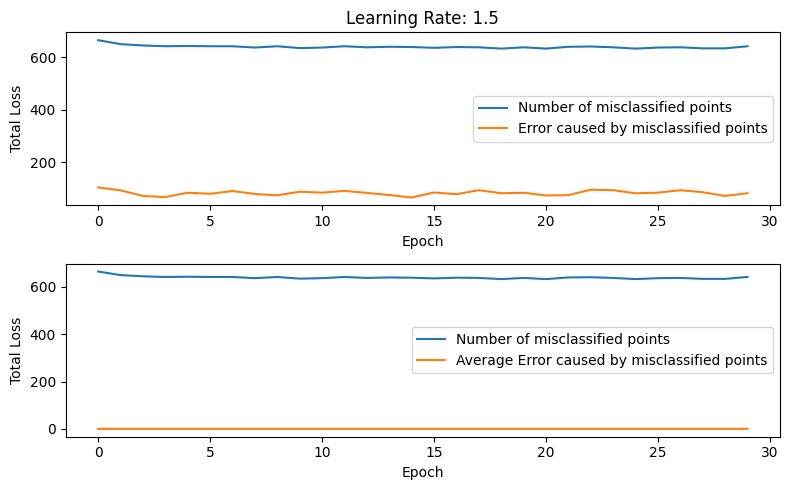

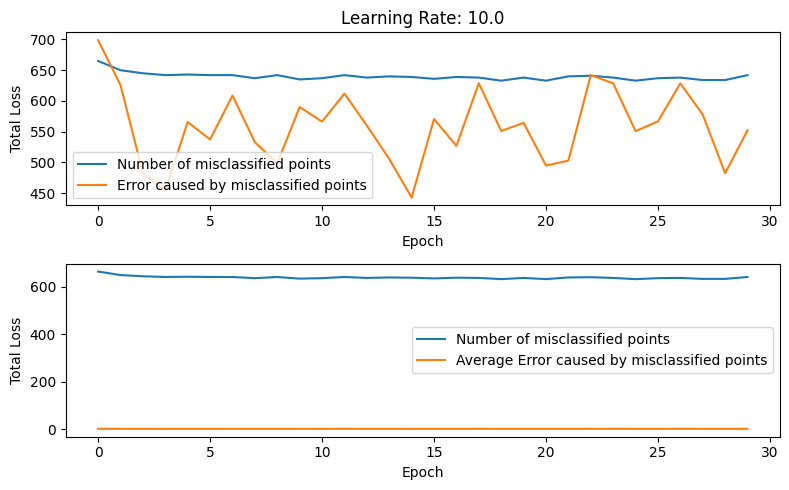

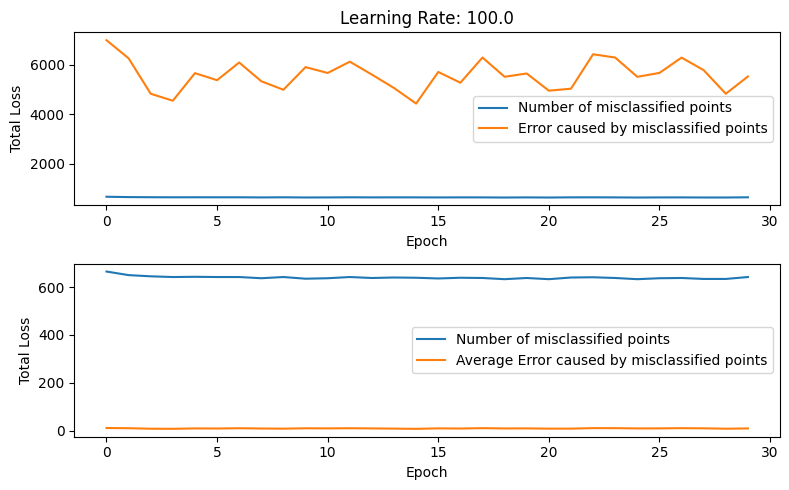

In [118]:
def perceptron_algo_plot_vary_lr(X, Y, learning_rates):
    '''
    Train perceptron with varying learning rates and plot the graphs separately for each learning rate.

    :param X: data samples
    :param Y: data labels
    :param learning_rates: list of learning rates to be tested
    '''
    n = 30

    for eta in learning_rates:
        w = np.zeros(len(X[0]))
        errors = []
        misclassified_points = []
        avg_error = []

        for t in range(n):
            total_error = 0
            number = 0
            for i, x in enumerate(X):
                if (np.dot(X[i], w) * Y[i]) <= 0:
                    number += 1
                    total_error += (np.dot(X[i], w) * Y[i])
                    w = w + eta * X[i] * Y[i]
            errors.append(total_error * -1)
            misclassified_points.append(number)
            if number == 0:
                avg_error.append(number)
            else:
                avg_error.append((total_error * -1) / number)

        plt.figure(figsize=(8, 5)) 
        plt.subplot(2, 1, 1)
        plt.plot(misclassified_points, label='Number of misclassified points')
        plt.plot(errors, label='Error caused by misclassified points')
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        plt.title(f'Learning Rate: {eta}')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(misclassified_points, label='Number of misclassified points')
        plt.plot(avg_error, label='Average Error caused by misclassified points')
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()


learning_rates = [0, 0.3, 0.6, 0.9, 1.2, 1.5,10.0, 100.0]
perceptron_algo_plot_vary_lr(x_train, y_train, learning_rates)


The low error caused by misclassified points suggests that most misclassifications have relatively small individual errors, but their cumulative effect contributes to a significant loss.

#Question 4

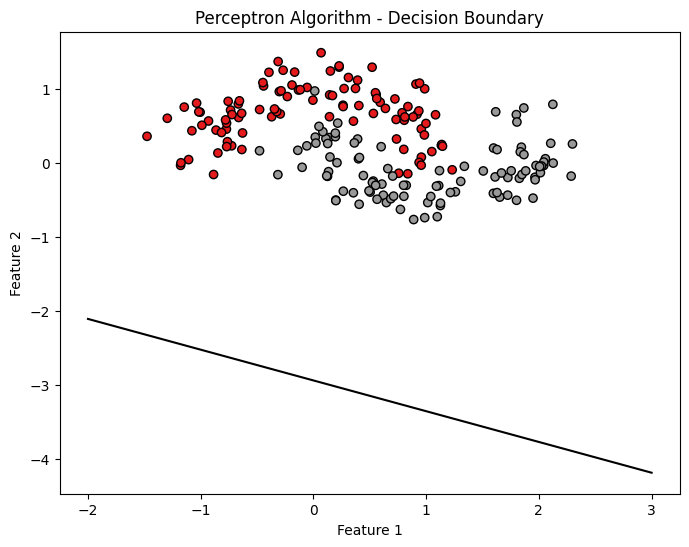

In [140]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def perceptron_algorithm(X, Y):
    w = np.zeros(len(X[0]) + 1)  
    eta = 1
    epochs = 100

    for epoch in range(epochs):
        for i, x in enumerate(X):
            x = np.concatenate(([1], x)) 
            if (np.dot(x, w) * Y[i]) <= 0:
                w = w + eta * x * Y[i]
    
    return w

w = perceptron_algorithm(X_train, y_train)

def predict(X, w):
    predictions = []
    for x in X:
        x = np.concatenate(([1], x))  
        prediction = np.sign(np.dot(x, w))
        predictions.append(prediction)
    return predictions

y_pred = predict(X_test, w)

x1 = np.linspace(-2, 3, 100)
x2 = -(w[0] + w[1]*x1) / w[2]  # Decision boundary equation: w0 + w1*x1 + w2*x2 = 0

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.plot(x1, x2, 'k-')
plt.title("Perceptron Algorithm - Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


When the perceptron algorithm is applied to a toy dataset that is not linearly separable, it will not converge and will continue to update the weights indefinitely.It will not give optimal results as no such hyperplane exists.



#Question 5

Methods that can be implemented:
1. Feature engineering: Creating new features that better capture the underlying patterns in the data can improve the separability.
2. Regularization: Adding a regularization term to the perceptron algorithm, such as L1 or L2 regularization, can help prevent overfitting and improve generalization to unseen data.
3. Using more advanced algorithms: Support vector machines (SVMs) or neural networks that can handle complex patterns.

#Question 6

The perceptron algorithm is made for binary classification and cannot directly handle multi-class classification problems.

Extensions can be applied for multi-class classification:
1. One-vs-All (One-vs-Rest)
2. One-vs-One
3. Error Correcting Output Codes (ECOC)
4. Multi-layer Perceptron (MLP)

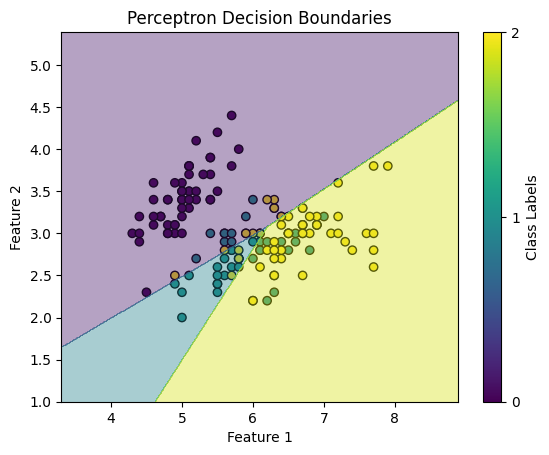

Accuracy: 0.8
Confusion Matrix:
[[10  0  0]
 [ 2  4  3]
 [ 0  1 10]]


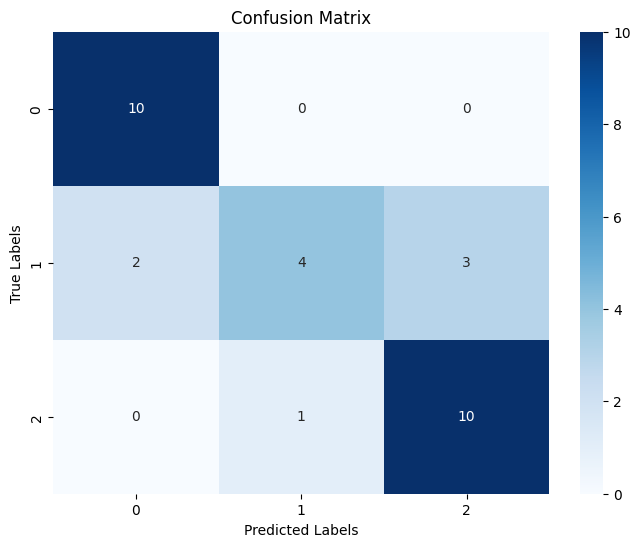

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

iris = load_iris()
X = iris.data[:, :2]  # Two features taken for visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron()

ovr_classifier = OneVsRestClassifier(perceptron)

ovr_classifier.fit(X_train, y_train)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

ax = plt.gca()
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                               np.arange(x2_min, x2_max, 0.01))
Z = ovr_classifier.predict(np.c_[x1_grid.ravel(), x2_grid.ravel()])
Z = Z.reshape(x1_grid.shape)
ax.contourf(x1_grid, x2_grid, Z, alpha=0.4, cmap='viridis')

cbar = plt.colorbar(ticks=np.unique(y))
cbar.set_label('Class Labels')

plt.title('Perceptron Decision Boundaries')
plt.show()

y_pred = ovr_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

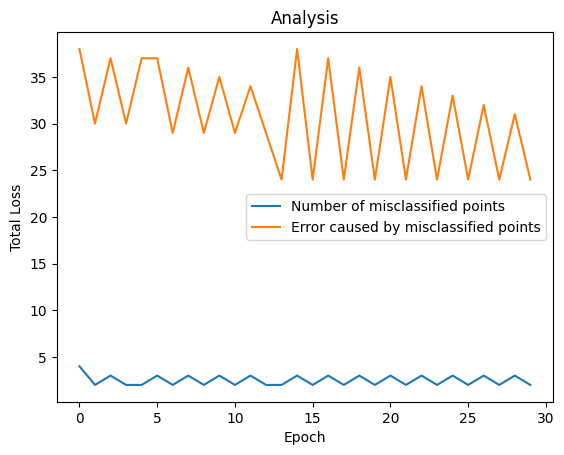

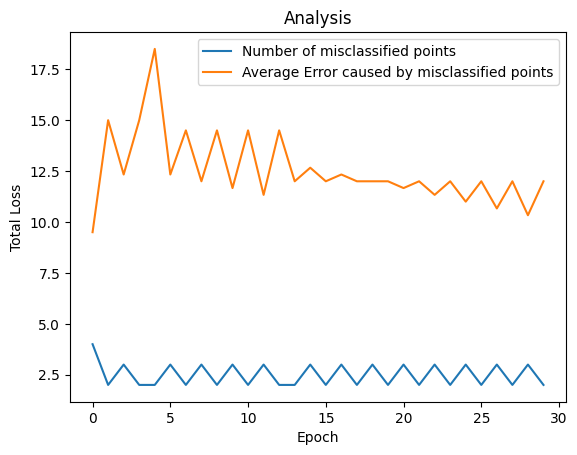

[-2.  3. 15.]


In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.